In [3]:
import sys
sys.path.append('il_pedagogical')

import il_pedagogical as ilp
import il_parse as ila
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
pd.options.display.float_format = '{:.0f}'.format

ini_pool_size = [25, 50, 75, 100]
plt.rcParams.update({'font.size': 14})
sns.set(style="white", palette="deep", color_codes=True, font_scale=1.5)
sns.set(style="white", palette="deep", color_codes=True, font_scale=1.5)


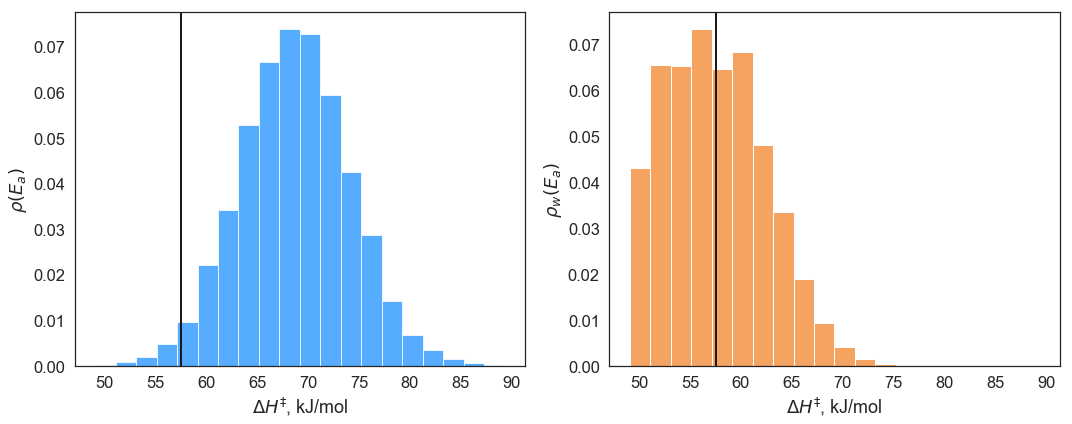

In [4]:
il_morse = ila.Parser('logs/morse_potential_50.json')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ilp.histogram(ax1, ax2, il_morse.true_barrier_heights(), il_morse.T(),n_bins=20)
ax1.set_xlabel(r'$E_a$, kJ/mol')
ax2.set_xlabel(r'$E_a$, kJ/mol')

ax1.set_xlabel(r'$\Delta H^\ddag$, kJ/mol')
ax2.set_xlabel(r'$\Delta H^\ddag$, kJ/mol')


fig.tight_layout()
plt.show()

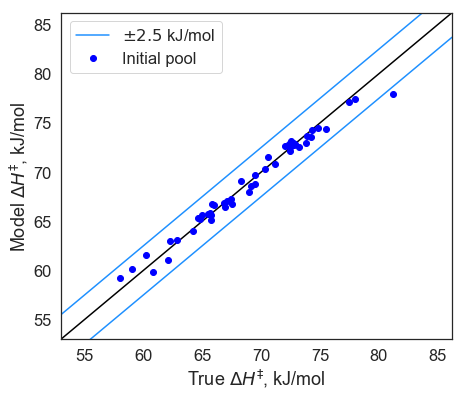

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(7, 6))

model_heights = il_morse.model_training_barrier_heights(0)
initial_pool = il_morse.sampled_sites(0)
true_barriers = il_morse.true_barrier_heights()

ilp.plot_trained(ax, model_heights, true_barriers[initial_pool], 2.5, 50)
ax.set_xlabel(r'True $\Delta H^\ddag$, kJ/mol')
ax.set_ylabel(r'Model $\Delta H^\ddag$, kJ/mol')
plt.show()

Text(0, 0.5, '$\\langle \\Delta H^\\ddag \\rangle_k$, kJ/mol')

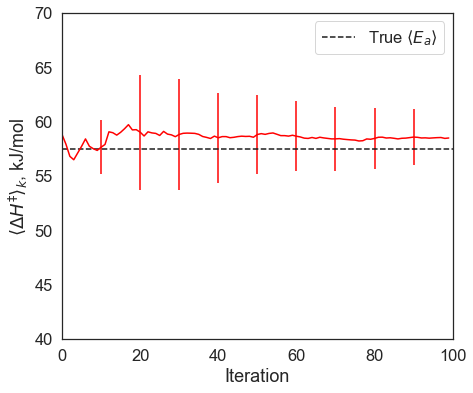

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(7, 6))
avg_Ea_exact = il_morse.true_site_avg_Ea()
avg_Ea_pred = il_morse.all_site_avg_Ea()
avg_Ea_pred_err = il_morse.all_site_Ea_sampling_error()
n_iterations =il_morse.n_iterations

#     plt.subplot(2,2,i+1)
# plt.title('IS Convergence, Initial Pool = {}'.format(ini_pool_size[i]))
ilp.plot_convergence(ax, n_iterations, avg_Ea_pred, avg_Ea_pred_err, avg_Ea_exact, 10)
ax.set_ylim(bottom=40, top=70)
ax.set_ylabel(r'$\langle \Delta H^\ddag \rangle_k$, kJ/mol')

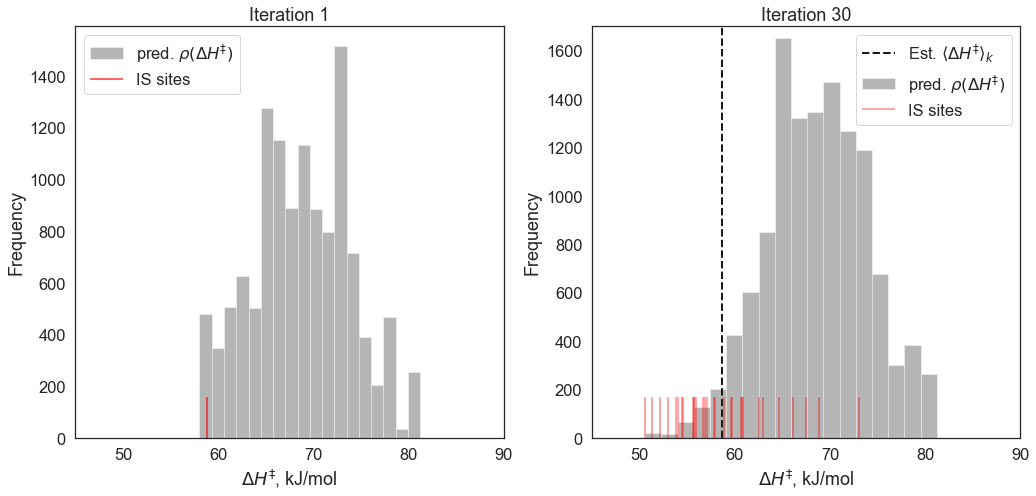

58.638226240925


In [9]:
iteration=30
n_bins = 18

initial_pool = il_morse.sampled_sites(0)
model_heights_1 = il_morse.model_barrier_heights(1)
sampled_sites_1 = il_morse.sampled_sites(1)

model_heights_iteration = il_morse.model_barrier_heights(iteration)
sampled_sites_iteration = il_morse.sampled_sites(iteration)


fig, axes = plt.subplots(1, 2, sharex=True, figsize=(14.5, 7))
axes[0].set_xlim([45, 90])
# Left Plot
sns.distplot(model_heights_1, ax=axes[0], kde=False, bins=n_bins, color="#474747", label=r'pred. $\rho(\Delta H^\ddag)$')
# sns.distplot(il_morse.true_barrier_heights()[initial_pool], ax=axes[0], hist=False,
#             bins=n_bins, kde=False, rug=True, color='b',
#             rug_kws={"linewidth": 2, "height":0.1, "alpha":0.5}, label="Initial pool", )

sns.distplot(il_morse.true_barrier_heights()[sampled_sites_1[ini_pool_size[1]:]], hist=False, ax=axes[0], 
             bins=n_bins, color="red", kde=False, rug=True, 
             rug_kws={"linewidth": 2, "height":0.1, "alpha":0.6}, label="IS sites")


# Right Plot
sns.distplot(model_heights_iteration, ax=axes[1], kde=False, bins=n_bins, color="#474747", label=r'pred. $\rho(\Delta H^\ddag)$')
# sns.distplot(il_morse.true_barrier_heights()[initial_pool], ax=axes[1], hist=False,
#             bins=n_bins, kde=False, rug=True, color='b',
#             rug_kws={"linewidth": 2, "height":0.1, "alpha":0.5}, label="Initial pool")

sns.distplot(il_morse.true_barrier_heights()[sampled_sites_iteration[ini_pool_size[1]:]], hist=False, ax=axes[1], 
             bins=n_bins, color="red", kde=False, rug=True, 
             rug_kws={"linewidth": 2, "height":0.1, "alpha":0.35}, label="IS sites")

axes[0].set_title(r'Iteration 1')
axes[1].set_title(r'Iteration {}'.format(iteration))
axes[1].set_ylim([0, 1700])
# axes[2].set_title(r'Initial pool $\rho(E_a)$')

axes[0].set_ylabel('Frequency')
axes[1].set_ylabel('Frequency')





axes[0].set_xlabel(r'$\Delta H^\ddag$, kJ/mol')
axes[1].set_xlabel(r'$\Delta H^\ddag$, kJ/mol')
axes[1].plot([58.63822, 58.63822],[0, 1700], '--', linewidth=2, color='k', label=r'Est. $\langle \Delta H^\ddag \rangle_k$')

axes[0].legend()
axes[1].legend()

plt.tight_layout()
plt.show()

print(il_morse.all_site_avg_Ea()[29])

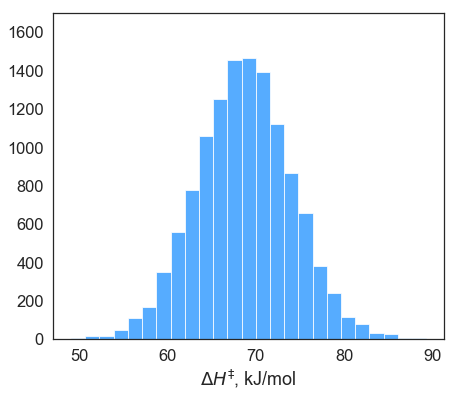

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(7, 6), sharey=True)

sns.distplot(il_morse.true_barrier_heights(), color='dodgerblue', kde=False, bins=25, hist_kws={'alpha': 0.75})
ax.set_ylim([0, 1700])
ax.set_xlabel('$\Delta H^\ddag$, kJ/mol')
plt.show()

Iteartion 1 standard deviation: 0.8 kJ/mol
Iteartion 30 standard deviation: 0.7 kJ/mol


Text(0.5, 1.0, 'Iteration 30')

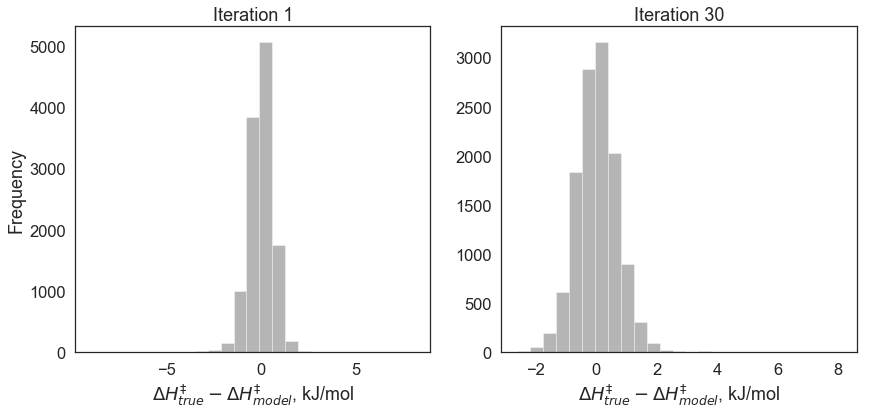

In [8]:
iteration = 30
il_morse = ila.Parser('logs/morse_potential_50.json')

model_heights_1 = il_morse.model_barrier_heights(1)
model_heights_iteration = il_morse.model_barrier_heights(iteration)

fig, axes = plt.subplots(1, 2, figsize=(14,6))
sns.distplot(il_morse.true_barrier_heights() - model_heights_1, ax=axes[0], kde=False, color='#474747', bins=25)
print("Iteartion 1 standard deviation: {:.1f} kJ/mol".format(np.std(model_heights_1 - il_morse.true_barrier_heights())))

sns.distplot(il_morse.true_barrier_heights() - model_heights_iteration, ax=axes[1], kde=False, color='#474747', bins=25)
print("Iteartion {} standard deviation: {:.1f} kJ/mol".format(iteration, np.std(model_heights_iteration - il_morse.true_barrier_heights())))

axes[0].set_xlabel(r'$\Delta H^\ddag_{true} - \Delta H^\ddag_{model}$, kJ/mol')
axes[1].set_xlabel(r'$\Delta H^\ddag_{true} - \Delta H^\ddag_{model}$, kJ/mol')
axes[0].set_ylabel('Frequency')

# axes[0].set_xlim([-3, 3])
# axes[1].set_xlim([-3, 3])


axes[0].set_title('Iteration 1')
axes[1].set_title('Iteration {}'.format(iteration))